In [2]:
!pip install mplfinance

## 常用得圖片設定
###  Markers設定:
 https://matplotlib.org/3.1.1/api/markers_api.html

### Colors設定:
 https://matplotlib.org/3.3.3/gallery/color/named_colors.html

## 根據公式繪製出均線:
    移動平均線 = 將 <N天的收盤價的加總> / N

In [2]:
# 設定輸入變數是天數!
def make_MA(days):
    days_mav = [np.nan] * (days - 1)  # 5日均線在第五天才有數值!
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days))
    return days_mav

                  Date   Open   High    Low  Close  Volume
Date                                                      
2021-05-05  2021/05/05  594.0  594.0  585.0  585.0   31787
2021-05-06  2021/05/06  590.0  590.0  580.0  587.0   33165
2021-05-07  2021/05/07  594.0  600.0  589.0  599.0   28720
2021-05-10  2021/05/10  596.0  597.0  588.0  589.0   21366
2021-05-11  2021/05/11  579.0  580.0  570.0  571.0   66036
                  Date   Open   High    Low  Close  Volume
Date                                                      
2021-09-16  2021/09/16  603.0  607.0  599.0  600.0   23315
2021-09-17  2021/09/17  600.0  610.0  599.0  600.0   42384
2021-09-22  2021/09/22  586.0  589.0  583.0  586.0   42732
2021-09-23  2021/09/23  588.0  593.0  588.0  588.0   22736
2021-09-24  2021/09/24  591.0  598.0  590.0  598.0   17303


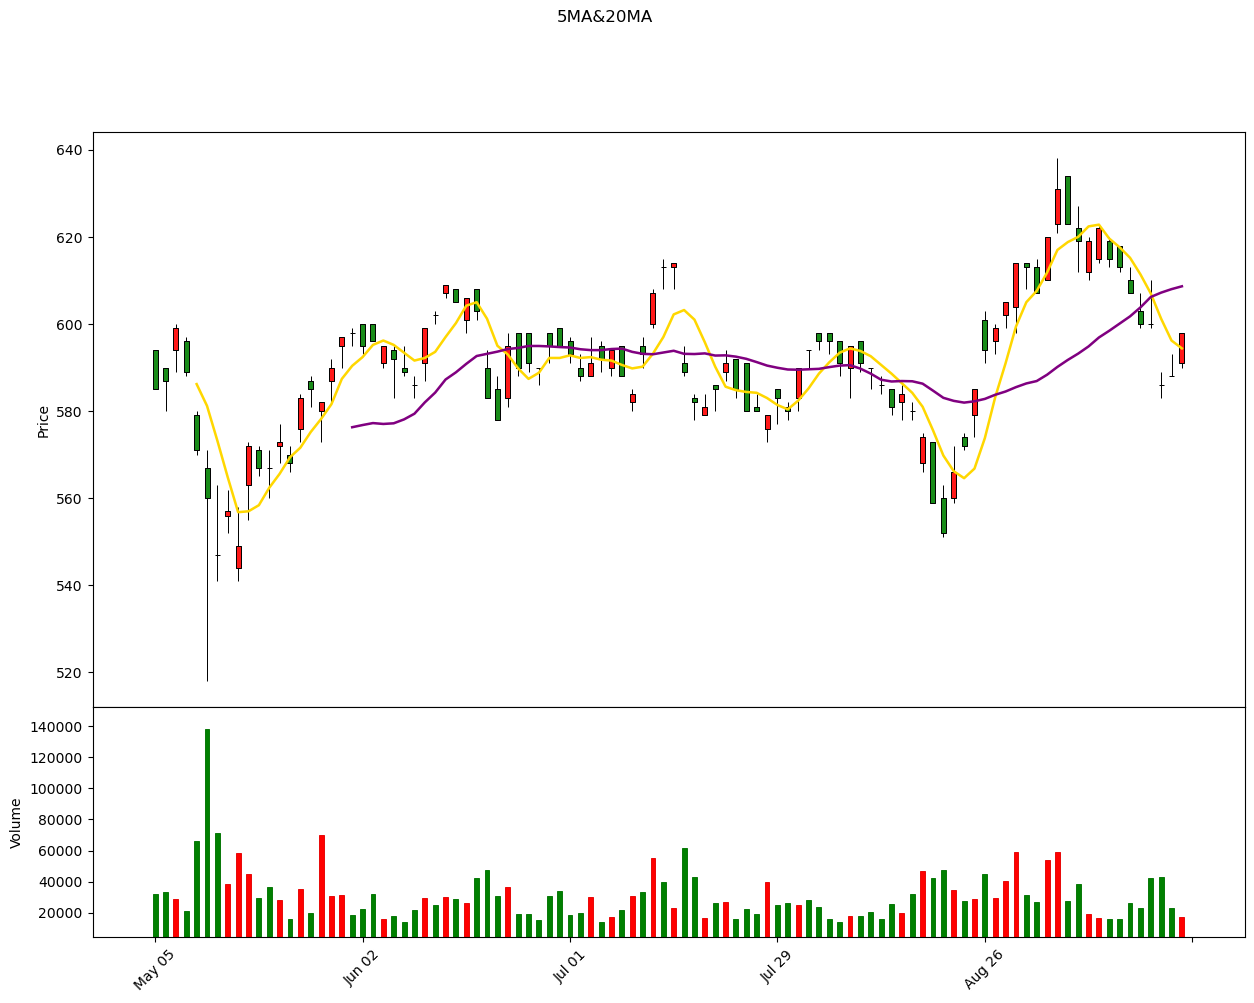

In [13]:
#Part1 介紹的自製移動平均線
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('2330.csv')

#修改時間格式: 兩種方式
#stocks.index = pd.DatetimeIndex(stocks["Date"])
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
#print(stocks.head())

#選取部分資料: 
stocks = stocks.loc['2020-01-01':,:]
stocks = stocks.tail(100)
print(stocks.head())
print(stocks.tail())
#print(len(stocks))

mc = mpf.make_marketcolors(up = 'r', down = 'g',volume='inherit') # volume='inherit', edge='inherit'
cs = mpf.make_mpf_style(marketcolors = mc)
kwargs = dict(type = 'candle', figscale = 2, style = cs,volume = True,\
             scale_width_adjustment = dict(volume = 0.5)) # volume=True


stocks_close = [line for line in stocks['Close']]
stocks_volume = [line for line in stocks['Volume']]
#print(stocks_close)

addplots = [
            mpf.make_addplot(make_MA(5), color = 'gold'),
            mpf.make_addplot(make_MA(20), color = 'purple')
           ]

#使用字典參數繪圖
mpf.plot(stocks, **kwargs, addplot = addplots, title='5MA&20MA')
# mpf.plot(SData, type='candle', volume=True, style=cs)

## 將買賣點標出來!!
以2603長榮股價為例
### step.1 建立長短均線串列
    > MA_5 = making_averages(5)   
    > MA_20 = making_averages(20)

### step.2 考量你的策略來設計判斷式(if):
   * 買入點： 5日線**突破**20日線買入
        * if(MA_5[i - 1] < MA_20[i - 1] and MA_5[i] > MA_20[i]):

   * 賣出點： 20日線**突破**5日線賣出
        * if(MA_5[i - 1] > MA_20[i - 1] and MA_5[i] < MA_20[i]):
        
### step.3 運用迴圈幫你找買賣點(for):
   * for i in range(21, len(stocks)):
   * 注意:21 為 20日均線 出現後的第一天!

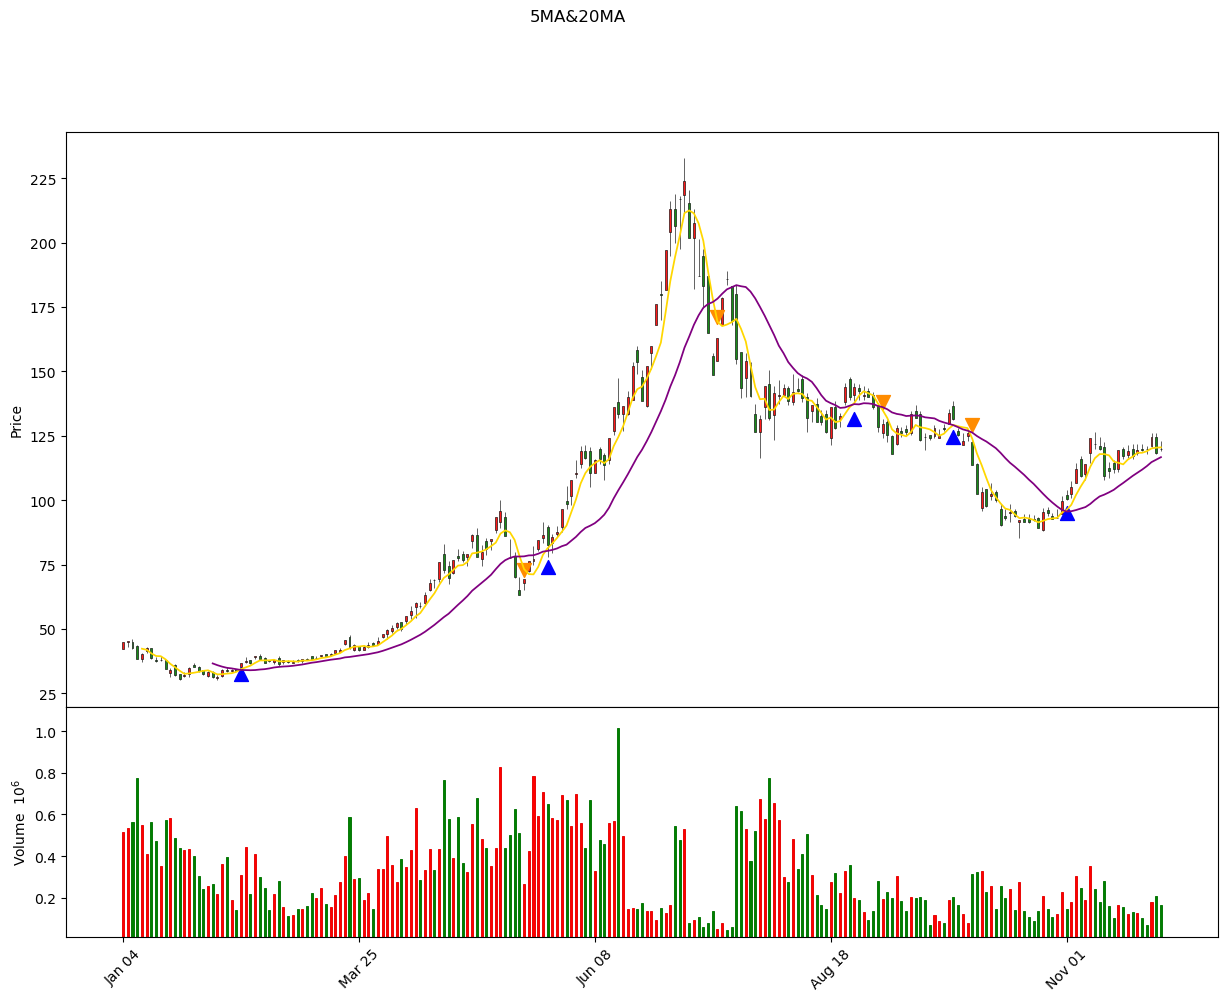

In [7]:
#Part2 畫點!
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('2603.csv')
#修改時間格式:
stocks.index = pd.DatetimeIndex(stocks["Date"])

#選取部分資料: 
stocks = stocks.loc['2020-01-01':,:]
stocks = stocks.tail(250)

mc = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit') # volume='inherit', edge='inherit'
cs = mpf.make_mpf_style(marketcolors = mc)
kwargs = dict(type = 'candle', figscale = 2, style = cs, volume=True,\
             scale_width_adjustment = dict(volume = 0.5)) # volume=True

stocks_close = [line for line in stocks['Close']]
stocks_high = [line for line in stocks['High']]
stocks_low = [line for line in stocks['Low']]

#策略實現
MA_5 = make_MA(5)      #取得5日均線串列  
MA_20 = make_MA(20)    #取得20日均線串列  

#繪製買賣點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

for i in range(21, len(stocks)):
    if(MA_5[i - 1] < MA_20[i - 1] and MA_5[i] > MA_20[i]):
        points_buy[i] = stocks_low[i] * 0.95              #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        
    if(MA_5[i - 1] > MA_20[i - 1] and MA_5[i] < MA_20[i]):
        points_sell[i] = stocks_high[i] * 1.05            #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(MA_5, color = 'gold'),
            mpf.make_addplot(MA_20, color = 'purple')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots,title='5MA&20MA')

支出： 495804 元
收入： 592766 元
淨收益： 96962 元
投資報酬率： 19.56 %


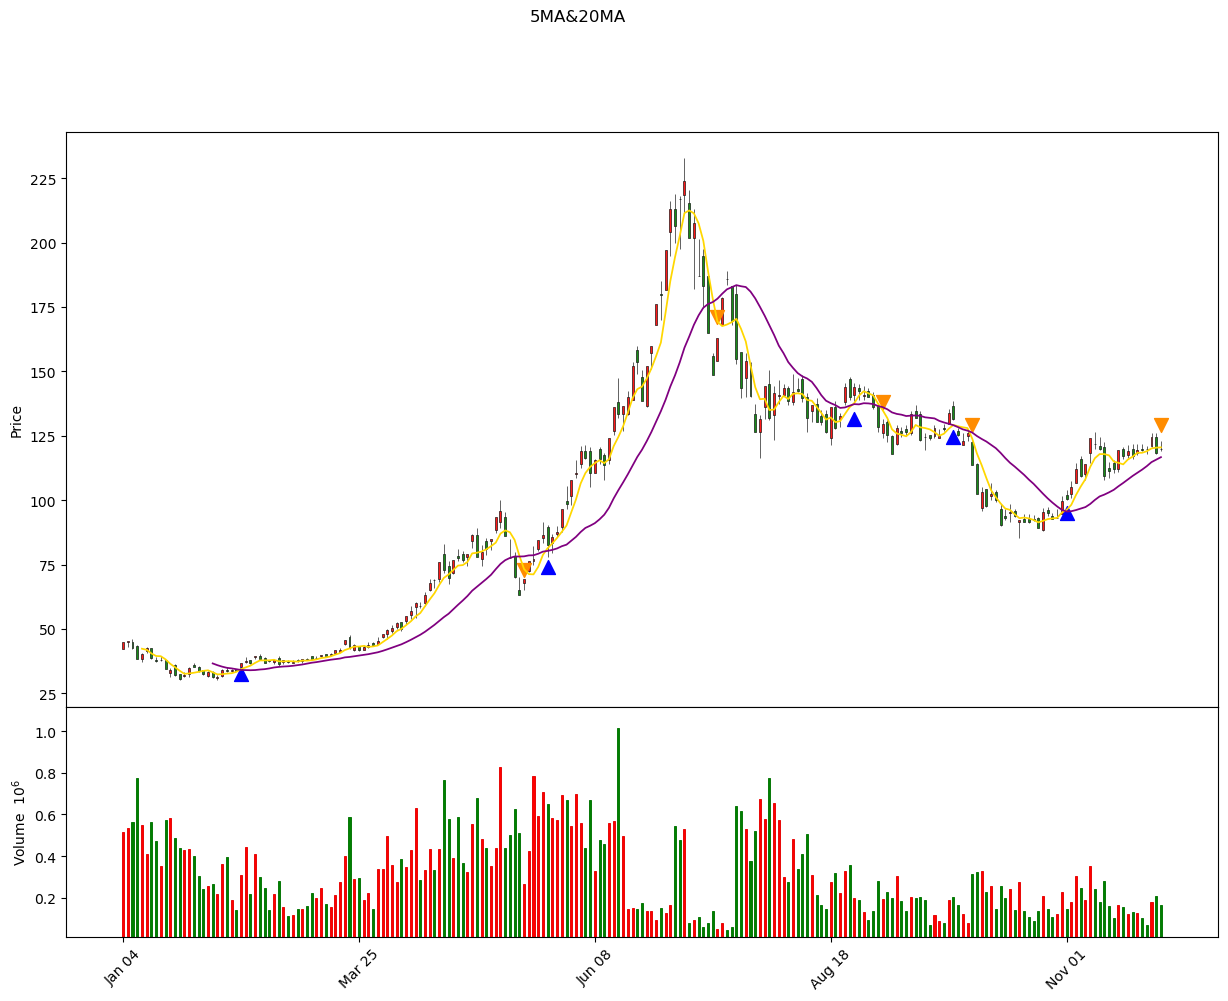

,0,1,2,3,4,5
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利
1,2021/02/17,+1,36.7,36.8,-36752,-36752
2,2021/05/18,-1,69.4,69,+69093,32341
3,2021/05/25,+1,82.4,82.5,-82517,-50176
4,2021/07/15,-1,163,162,+162279,112103
5,2021/08/25,+1,144,144.2,-144205,-32102
6,2021/09/02,-1,129.5,129,+128927,96825
7,2021/09/27,+1,131.5,131.7,-131687,-34862
8,2021/10/01,-1,113.5,113,+112998,78136
9,2021/11/01,+1,100.5,100.6,-100643,-22507


In [10]:
# 計算報酬率！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('2603.csv')
#修改時間格式:
stocks.index = pd.DatetimeIndex(stocks["Date"])

#選取部分資料: 
stocks = stocks.loc['2020-01-01':,:]
stocks = stocks.tail(250)
mean_v = round(stocks['Volume'].mean())
stocks_close = [line for line in stocks['Close']]
stocks_high = [line for line in stocks['High']]
stocks_low = [line for line in stocks['Low']]
stocks_vol = [line for line in stocks['Volume']]

#策略實現
MA_5 = make_MA(5)      #取得5日均線串列  
MA_20 = make_MA(20)    #取得20日均線串列  

#繪製買賣點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

num = 0
gain = 0
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
temp = []

for i in range(21, len(stocks)):
    if(MA_5[i - 1] < MA_20[i - 1] and MA_5[i] > MA_20[i] ):
        if(num==0):
            points_buy[i] = stocks_low[i] * 0.95              
            num+=1
            gain -= round(stocks_close[i] * 1.001425 * num * 1000)
            temp.append(stocks['Date'][i])
            temp.append('+' + str(num))                                            #買賣 unit張，這邊假設為 1
            temp.append(stocks_close[i])                                            #購買日買入價格，這邊假設為收盤價
            temp.append(round(stocks_close[i] * 1.001425, 1))                       #抽稅之後的價格
            temp.append('-' + str(round(stocks_close[i] * 1.001425 * num * 1000))) #實際花費 (四捨五入到個位數)
            temp.append(gain)                                                       #目前獲利
            detail.append(temp)                                                     #紀錄交易資訊至正是表格中
            temp = []              
            
    if(MA_5[i - 1] > MA_20[i - 1] and MA_5[i] < MA_20[i]):
        if(num>0):
            points_sell[i] = stocks_high[i] * 1.05            
            gain += round(stocks_close[i] * 0.995575 * num * 1000)
            temp.append(stocks['Date'][i])
            temp.append('-' + str(num))                                           #股票全部賣出
            temp.append(stocks_close[i])                                            #賣出日賣出價格，這邊假設為收盤價
            temp.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格
            temp.append('+' + str(round(stocks_close[i] * 0.995575 * num * 1000)))#實際收入 (四捨五入到個位數)
            temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
            detail.append(temp)
            num-=1
            temp = []     

if(num==1):
    points_sell[i] = stocks_high[i] * 1.05            
    gain += round(stocks_close[i] * 0.995575 * num * 1000)
    temp.append(stocks['Date'][i])
    temp.append('-' + str(num))                                           #股票全部賣出
    temp.append(stocks_close[i])                                            #賣出日賣出價格，這邊假設為收盤價
    temp.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格
    temp.append('+' + str(round(stocks_close[i] * 0.995575 * num * 1000)))#實際收入 (四捨五入到個位數)
    temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
    detail.append(temp)
    num-=1
    temp = []
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%") 


#點狀圖 type = 'scatter'，markersize可以更改 marker大小

mc = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit') # volume='inherit', edge='inherit'
cs = mpf.make_mpf_style(marketcolors = mc)
kwargs = dict(type = 'candle', figscale = 2, style = cs, volume=True,\
             scale_width_adjustment = dict(volume = 0.5)) # volume=True

addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(MA_5, color = 'gold'),
            mpf.make_addplot(MA_20, color = 'purple')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots,title='5MA&20MA')

detail = pd.DataFrame(detail)
detail

## 考慮成交量！

### 找出判斷成交量大小的標準
    > mean_v = stocks['Volume']
### 當出現買進訊號時，判斷成交量是否大於設定值
    > if(stocks_vol[i]>300000):

In [21]:
#找出平均的成交量
print(round(stocks['Volume'].mean()),'張')

321269 張


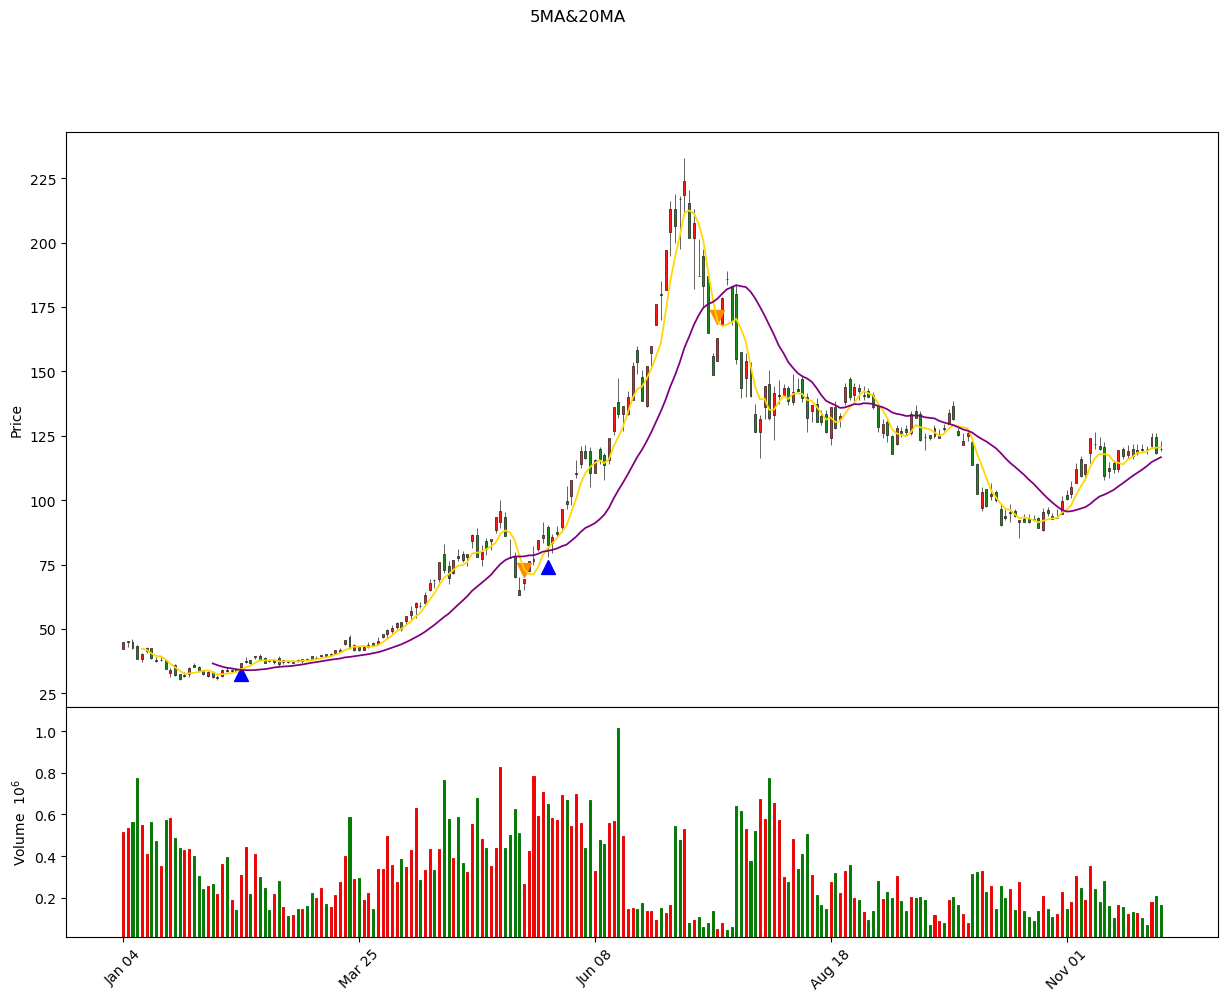

In [51]:
# 考慮成交量！
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('2603.csv')
#修改時間格式:
stocks.index = pd.DatetimeIndex(stocks["Date"])

#選取部分資料: 
stocks = stocks.loc['2020-01-01':,:]
stocks = stocks.tail(250)

mc = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit') # volume='inherit', edge='inherit'
cs = mpf.make_mpf_style(marketcolors = mc)
kwargs = dict(type = 'candle', figscale = 2, style = cs, volume=True,\
             scale_width_adjustment = dict(volume = 0.5)) # volume=True

mean_v = round(stocks['Volume'].mean())
stocks_close = [line for line in stocks['Close']]
stocks_high = [line for line in stocks['High']]
stocks_low = [line for line in stocks['Low']]
stocks_vol = [line for line in stocks['Volume']]

#策略實現
MA_5 = make_MA(5)      #取得5日均線串列  
MA_20 = make_MA(20)    #取得20日均線串列  

#繪製買賣點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點
num = 0
for i in range(21, len(stocks)):
    if(MA_5[i - 1] < MA_20[i - 1] and MA_5[i] > MA_20[i] ):
        if(stocks_vol[i]>300000):
            points_buy[i] = stocks_low[i] * 0.95              #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
            num+=1
            
    if(MA_5[i - 1] > MA_20[i - 1] and MA_5[i] < MA_20[i]):
        if(num>0):
            points_sell[i] = stocks_high[i] * 1.05            #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
            num-=1
            
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(MA_5, color = 'gold'),
            mpf.make_addplot(MA_20, color = 'purple')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots,title='5MA&20MA')

支出： 119269 元
收入： 231372 元
淨收益： 112103 元
投資報酬率： 93.99 %


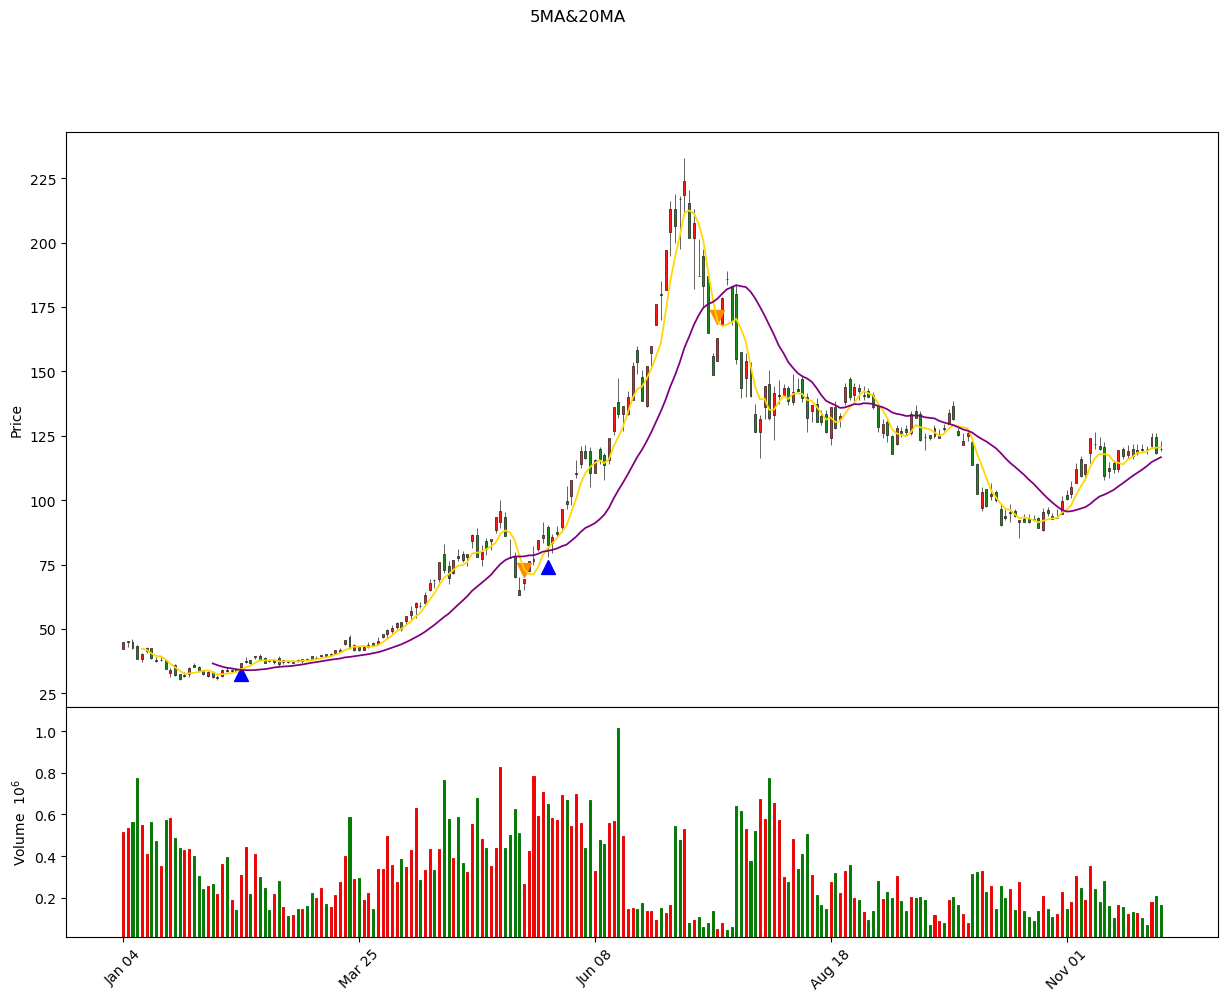

,0,1,2,3,4,5
0,日期,買/賣,成交價,價格(稅),實際花費,目前獲利
1,2021/02/17,+1,36.7,36.8,-36752,-36752
2,2021/05/18,-1,69.4,69,+69093,32341
3,2021/05/25,+1,82.4,82.5,-82517,-50176
4,2021/07/15,-1,163,162,+162279,112103


In [11]:
#計算報酬率！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('2603.csv')
#修改時間格式:
stocks.index = pd.DatetimeIndex(stocks["Date"])

#選取部分資料: 
stocks = stocks.loc['2020-01-01':,:]
stocks = stocks.tail(250)
mean_v = round(stocks['Volume'].mean())
stocks_close = [line for line in stocks['Close']]
stocks_high = [line for line in stocks['High']]
stocks_low = [line for line in stocks['Low']]
stocks_vol = [line for line in stocks['Volume']]

#策略實現
MA_5 = make_MA(5)      #取得5日均線串列  
MA_20 = make_MA(20)    #取得20日均線串列  

#繪製買賣點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

num = 0
gain = 0
detail = [['日期', '買/賣', '成交價', '價格(稅)', '實際花費', '目前獲利']]
temp = []

for i in range(21, len(stocks)):
    if(MA_5[i - 1] < MA_20[i - 1] and MA_5[i] > MA_20[i] ):
        if(stocks_vol[i]>300000):
            points_buy[i] = stocks_low[i] * 0.95              
            num+=1
            gain -= round(stocks_close[i] * 1.001425 * num * 1000)
            temp.append(stocks['Date'][i])
            temp.append('+' + str(num))                                            #買賣 unit張，這邊假設為 1
            temp.append(stocks_close[i])                                            #購買日買入價格，這邊假設為收盤價
            temp.append(round(stocks_close[i] * 1.001425, 1))                       #抽稅之後的價格
            temp.append('-' + str(round(stocks_close[i] * 1.001425 * num * 1000))) #實際花費 (四捨五入到個位數)
            temp.append(gain)                                                       #目前獲利
            detail.append(temp)                                                     #紀錄交易資訊至正是表格中
            temp = []              
            
    if(MA_5[i - 1] > MA_20[i - 1] and MA_5[i] < MA_20[i]):
        if(num>0):
            points_sell[i] = stocks_high[i] * 1.05            
            
            gain += round(stocks_close[i] * 0.995575 * num * 1000)
            temp.append(stocks['Date'][i])
            temp.append('-' + str(num))                                           #股票全部賣出
            temp.append(stocks_close[i])                                            #賣出日賣出價格，這邊假設為收盤價
            temp.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格
            temp.append('+' + str(round(stocks_close[i] * 0.995575 * num * 1000)))#實際收入 (四捨五入到個位數)
            temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
            detail.append(temp)
            num-=1
            temp = []     

cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")             


#點狀圖 type = 'scatter'，markersize可以更改 marker大小
mc = mpf.make_marketcolors(up = 'r', down = 'g', volume = 'inherit') # volume='inherit', edge='inherit'
cs = mpf.make_mpf_style(marketcolors = mc)
kwargs = dict(type = 'candle', figscale = 2, style = cs, volume=True,\
             scale_width_adjustment = dict(volume = 0.5)) # volume=True
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(MA_5, color = 'gold'),
            mpf.make_addplot(MA_20, color = 'purple')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots,title='5MA&20MA')

detail = pd.DataFrame(detail)
detail